<a href="https://colab.research.google.com/github/habeeb0502/habeeb0502/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dmba

In [ ]:
import dmba
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Colab environment detected.


In [ ]:
house_df = pd.read_excel('HousePricePrediction.xlsx')
house_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
# Check for any Object types we need to convert
house_df.shape
house_df.dtypes
house_df.tail
print(house_df.shape)
print(house_df.dtypes)
print(house_df.tail)

(2919, 13)
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object
<bound method NDFrame.tail of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160   

In [ ]:
house_df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [ ]:
house_df.isnull().any().any()
house_df.isnull().sum()
print(house_df.isnull().any().any())
print(house_df.isnull().sum())

True
Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [ ]:
house_df.dropna()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


<Axes: >

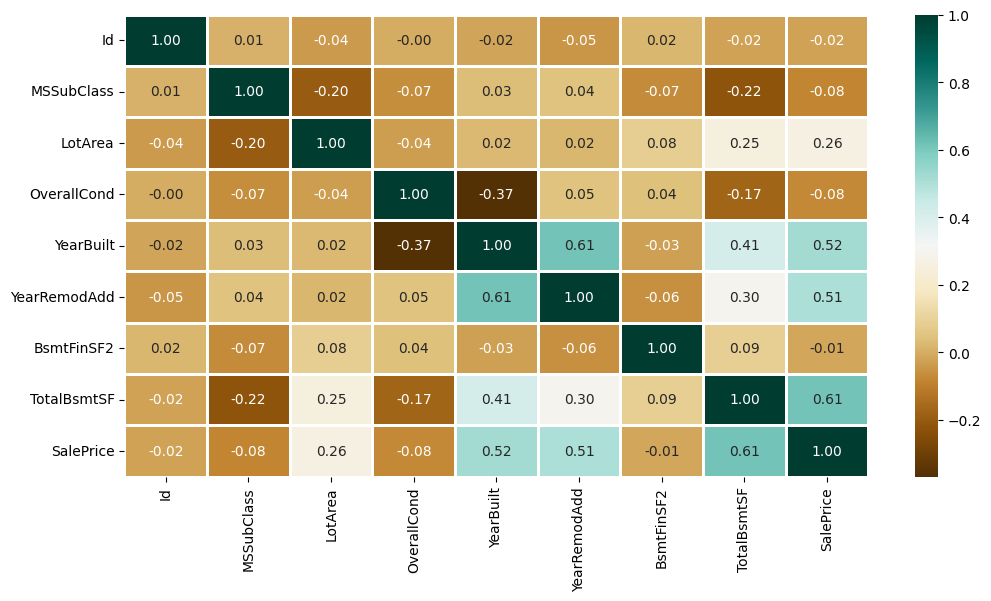

In [ ]:
num_house_df = house_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(num_house_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [ ]:
obj = (house_df.dtypes == 'object')
object_cols = list(obj[obj].index)

In [ ]:
int_ = (house_df.dtypes == 'int')
num_cols = list(int_[int_].index)

In [ ]:
fl = (house_df.dtypes == 'float')
fl_cols = list(fl[fl].index)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

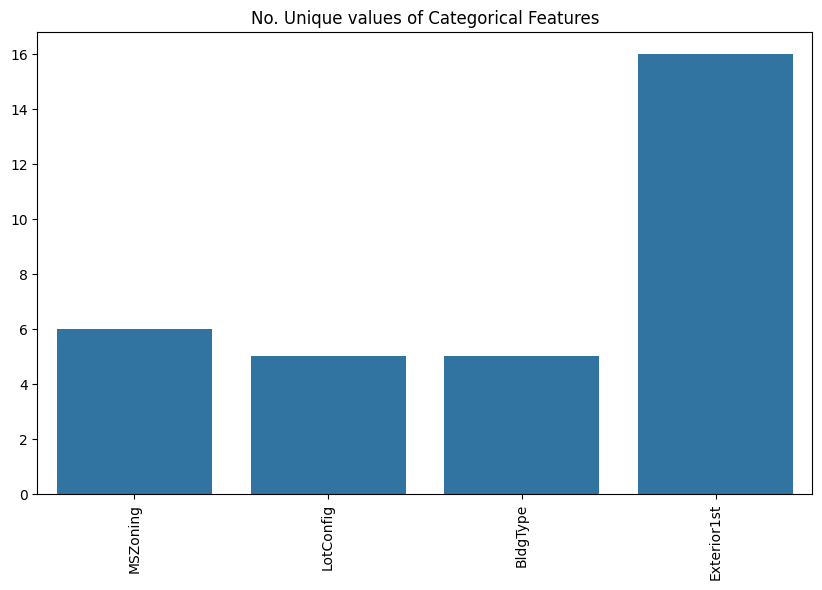

In [ ]:
unique_values = []
for col in object_cols:
  unique_values.append(house_df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<ipython-input-13-5525f25c6475>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


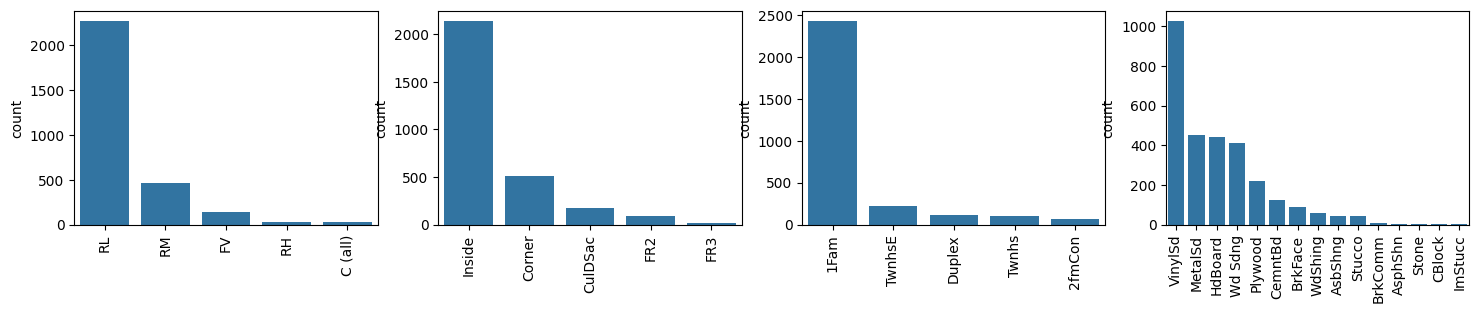

In [ ]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = house_df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [ ]:
house_df.drop(['Id'],
             axis=1,
             inplace=True)

In [ ]:
house_df['SalePrice'] = house_df['SalePrice'].fillna(
  house_df['SalePrice'].mean())

In [ ]:
df = house_df.dropna()
df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object') #Checks which columns are of type 'object'.
object_cols = list(s[s].index) #Extracts the columns name
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #Explains what settings are being used for the encoder.
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols])) # categorical columns are btransformed into a new one-hot encoded format
OH_cols.index = df.index #column names are being aligned to maintain consistency with the original DataFrame.
OH_cols.columns = OH_encoder.get_feature_names_out() #column names are being aligned to maintain consistency with the original DataFrame.
df_final = df.drop(object_cols, axis=1) # the original categorical columns are being removed.
df_final = pd.concat([df_final, OH_cols], axis=1) #Describes the final step of combining the processed DataFrame with the one-hot encoded columns.

In [ ]:
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# Creates a Scatterplot
def plot_scatter(Y_valid, Y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_valid, Y_pred, alpha=0.6)
    plt.plot([Y_valid.min(), Y_valid.max()], [Y_valid.min(), Y_valid.max()], 'r--')  # Diagonal line
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

R-squared: Indicates how well the model explains the variability of the target variable. Closer to 1 is better.

Mean Absolute Percentage Error (MAPE): A lower value indicates better performance.

Mean Absolute Error (MAE): A lower value is better.

Root Mean Squared Error (RMSE): A lower value indicates better performance.

SVM Model

In [ ]:
from sklearn.svm import SVR

model_SVR = SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

mape_SVR = mean_absolute_percentage_error(Y_valid, Y_pred)
r_squared_SVR = r2_score(Y_valid, Y_pred)
mae_SVR = mean_absolute_error(Y_valid, Y_pred)
rmse_SVR = np.sqrt(mean_squared_error(Y_valid, Y_pred))

print(f'MAPE: {mape_SVR:.4f}')
print(f'R-squared: {r_squared_SVR:.4f}')
print(f'Mean Absolute Error (MAE): {mae_SVR:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_SVR:.4f}')

MAPE: 0.1871
R-squared: 0.0000
Mean Absolute Error (MAE): 28848.6812
Root Mean Squared Error (RMSE): 52000.9021


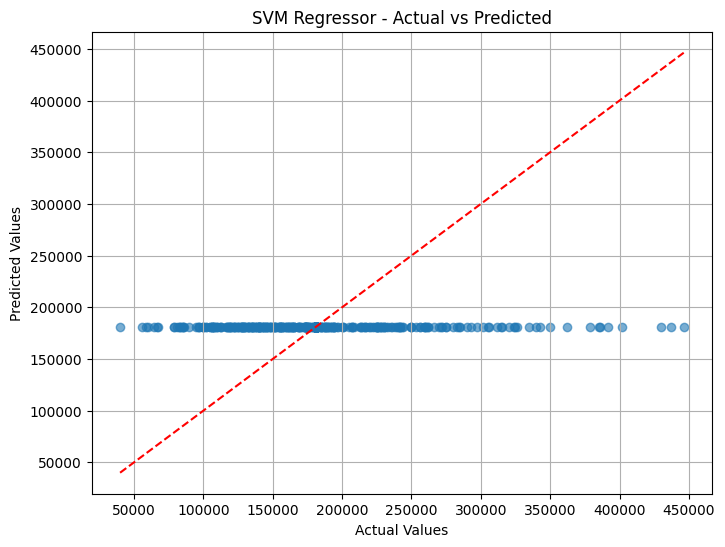

In [ ]:
Y_pred = model_SVR.predict(X_valid)
plot_scatter(Y_valid, Y_pred, 'SVM Regressor')

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()
model_RF.fit(X_train, Y_train)
Y_pred = model_RF.predict(X_valid)

mape_RF = mean_absolute_percentage_error(Y_valid, Y_pred)
r_squared_RF = r2_score(Y_valid, Y_pred)
mae_RF = mean_absolute_error(Y_valid, Y_pred)
rmse_RF = np.sqrt(mean_squared_error(Y_valid, Y_pred))

print(f'MAPE: {mape_RF:.4f}')
print(f'R-squared: {r_squared_RF:.4f}')
print(f'Mean Absolute Error (MAE): {mae_RF:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_RF:.4f}')

MAPE: 0.1858
R-squared: 0.3263
Mean Absolute Error (MAE): 30571.8202
Root Mean Squared Error (RMSE): 42681.2486


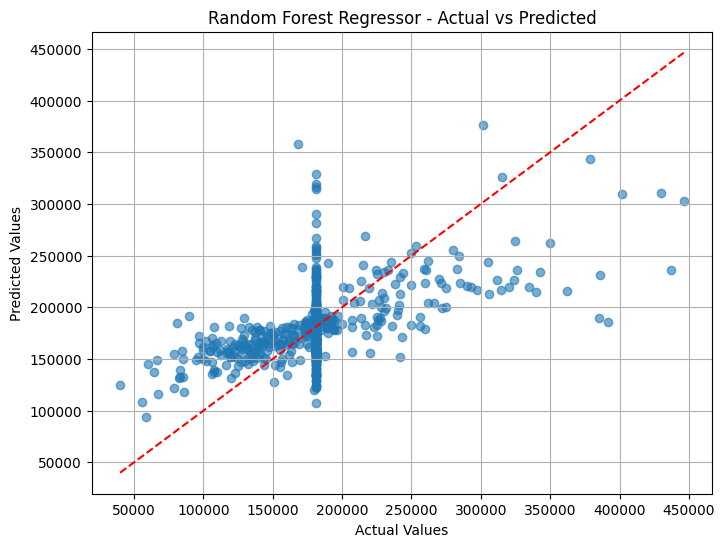

In [ ]:
Y_pred = model_RF.predict(X_valid)
plot_scatter(Y_valid, Y_pred, 'Random Forest Regressor')

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

mape_LR = mean_absolute_percentage_error(Y_valid, Y_pred)
r_squared_LR = r2_score(Y_valid, Y_pred)
mae_LR = mean_absolute_error(Y_valid, Y_pred)
rmse_LR = np.sqrt(mean_squared_error(Y_valid, Y_pred))

print(f'MAPE: {mape_LR:.4f}')
print(f'R-squared: {r_squared_LR:.4f}')
print(f'Mean Absolute Error (MAE): {mae_LR:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_LR:.4f}')

MAPE: 0.1874
R-squared: 0.3741
Mean Absolute Error (MAE): 30829.9367
Root Mean Squared Error (RMSE): 41138.5557


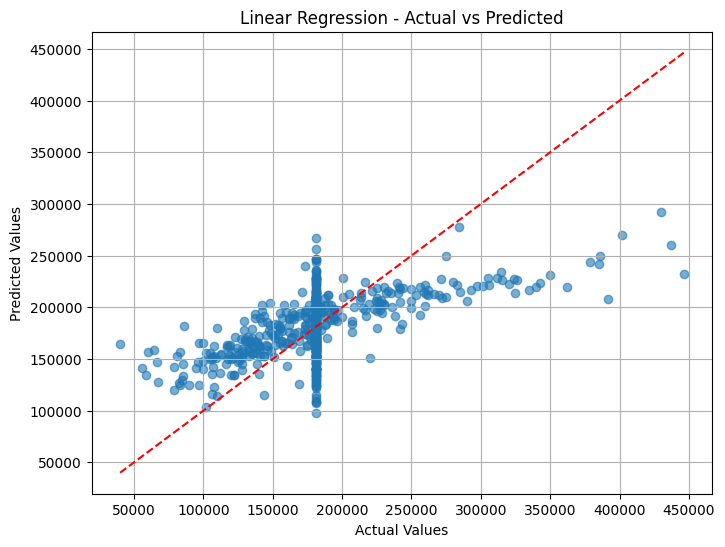

In [ ]:
Y_pred = model_LR.predict(X_valid)
plot_scatter(Y_valid, Y_pred, 'Linear Regression')

Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso(alpha=1.0)
model_Lasso.fit(X_train, Y_train)
Y_pred = model_Lasso.predict(X_valid)

mape_Lasso = mean_absolute_percentage_error(Y_valid, Y_pred)
r_squared_Lasso = r2_score(Y_valid, Y_pred)
mae_Lasso = mean_absolute_error(Y_valid, Y_pred)
rmse_Lasso = np.sqrt(mean_squared_error(Y_valid, Y_pred))

print(f'MAPE: {mape_Lasso:.4f}')
print(f'R-squared: {r_squared_Lasso:.4f}')
print(f'Mean Absolute Error (MAE): {mae_Lasso:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_Lasso:.4f}')

MAPE: 0.1873
R-squared: 0.3744
Mean Absolute Error (MAE): 30824.6767
Root Mean Squared Error (RMSE): 41130.5854


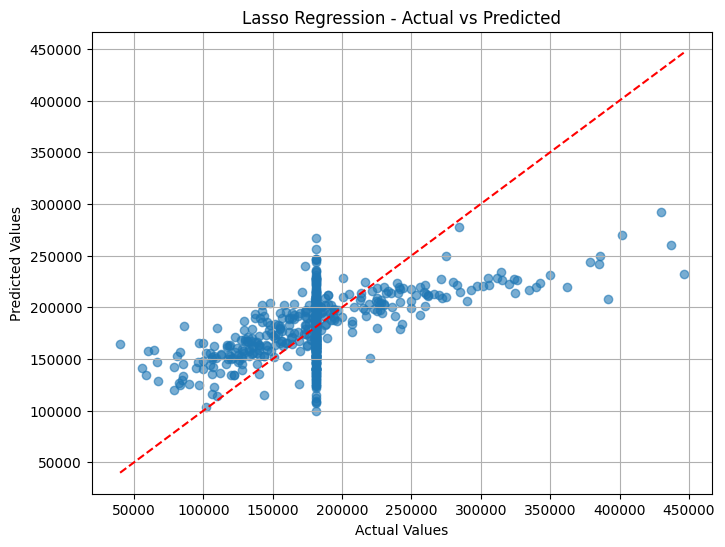

In [ ]:
Y_pred = model_Lasso.predict(X_valid)
plot_scatter(Y_valid, Y_pred, 'Lasso Regression')

Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, Y_train)
Y_pred = model_DT.predict(X_valid)

mape_DT = mean_absolute_percentage_error(Y_valid, Y_pred)
r_squared_DT = r2_score(Y_valid, Y_pred)
mae_DT = mean_absolute_error(Y_valid, Y_pred)
rmse_DT = np.sqrt(mean_squared_error(Y_valid, Y_pred))

print(f'MAPE: {mape_DT:.4f}')
print(f'R-squared: {r_squared_DT:.4f}')
print(f'Mean Absolute Error (MAE): {mae_DT:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_DT:.4f}')

MAPE: 0.2206
R-squared: -0.3483
Mean Absolute Error (MAE): 37583.0902
Root Mean Squared Error (RMSE): 60381.7560


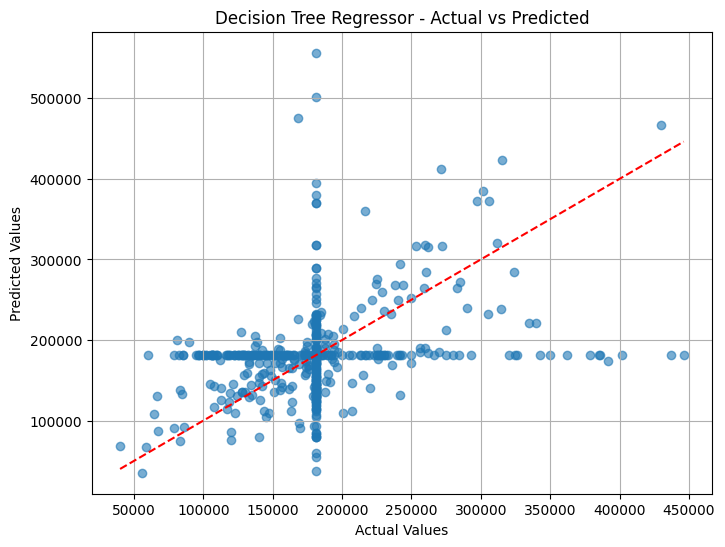

In [ ]:
Y_pred = model_DT.predict(X_valid)
plot_scatter(Y_valid, Y_pred, 'Decision Tree Regressor')

KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train, Y_train)
Y_pred = model_KNN.predict(X_valid)

mape_KNN = mean_absolute_percentage_error(Y_valid, Y_pred)
r_squared_KNN = r2_score(Y_valid, Y_pred)
mae_KNN = mean_absolute_error(Y_valid, Y_pred)
rmse_KNN = np.sqrt(mean_squared_error(Y_valid, Y_pred))

print(f'MAPE: {mape_KNN:.4f}')
print(f'R-squared: {r_squared_KNN:.4f}')
print(f'Mean Absolute Error (MAE): {mae_KNN:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_KNN:.4f}')

MAPE: 0.2038
R-squared: 0.1701
Mean Absolute Error (MAE): 33294.9157
Root Mean Squared Error (RMSE): 47372.2585


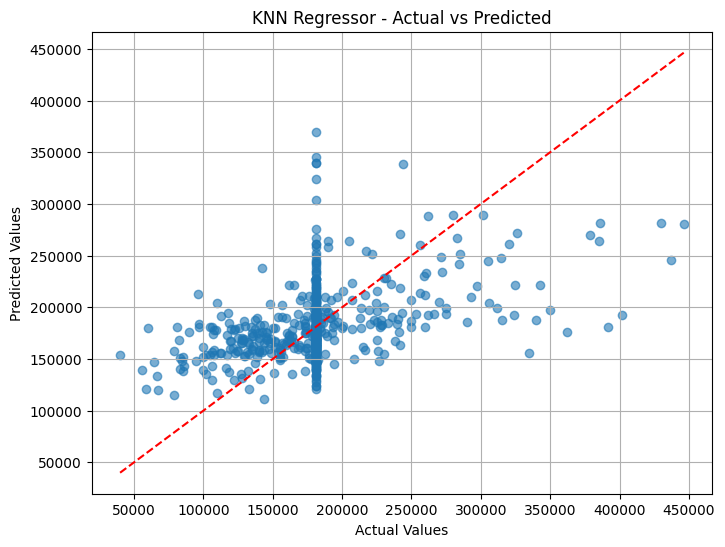

In [ ]:
Y_pred = model_KNN.predict(X_valid)
plot_scatter(Y_valid, Y_pred, 'KNN Regressor')

Model Comparison and Summary

In [ ]:
# Calculated metrics for each model
results = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVM'],
    'R-squared': [r_squared_LR, r_squared_Lasso, r_squared_DT, r_squared_KNN, r_squared_RF, r_squared_SVR],
    'MAPE': [mape_LR, mape_Lasso, mape_DT, mape_KNN, mape_RF, mape_SVR],
    'MAE': [mae_LR, mae_Lasso, mae_DT, mae_KNN, mae_RF, mae_SVR],
    'RMSE': [rmse_LR, rmse_Lasso, rmse_DT, rmse_KNN, rmse_RF, rmse_SVR]
}

summary_df = pd.DataFrame(results)

# Find best models based on each metric
best_r_squared_model = summary_df.loc[summary_df['R-squared'].idxmax()]
best_mape_model = summary_df.loc[summary_df['MAPE'].idxmin()]
best_mae_model = summary_df.loc[summary_df['MAE'].idxmin()]
best_rmse_model = summary_df.loc[summary_df['RMSE'].idxmin()]

# Print the summary table
print("Model Performance Summary:")
print(summary_df)

# Print best models
print("\nBest Model by Each Metric:")
print(f"Best R-squared Model: {best_r_squared_model['Model']} with R-squared: {best_r_squared_model['R-squared']:.4f}")
print(f"Best MAPE Model: {best_mape_model['Model']} with MAPE: {best_mape_model['MAPE']:.4f}")
print(f"Best MAE Model: {best_mae_model['Model']} with MAE: {best_mae_model['MAE']:.4f}")
print(f"Best RMSE Model: {best_rmse_model['Model']} with RMSE: {best_rmse_model['RMSE']:.4f}")


Model Performance Summary:
               Model  R-squared      MAPE           MAE          RMSE
0  Linear Regression   0.374142  0.187417  30829.936664  41138.555717
1   Lasso Regression   0.374385  0.187332  30824.676691  41130.585366
2      Decision Tree  -0.348308  0.220637  37583.090227  60381.755977
3                KNN   0.170100  0.203835  33294.915706  47372.258546
4      Random Forest   0.326323  0.185773  30571.820184  42681.248574
5                SVM   0.000002  0.187051  28848.681204  52000.902138

Best Model by Each Metric:
Best R-squared Model: Lasso Regression with R-squared: 0.3744
Best MAPE Model: Random Forest with MAPE: 0.1858
Best MAE Model: SVM with MAE: 28848.6812
Best RMSE Model: Lasso Regression with RMSE: 41130.5854


According to the model performance summary,It looks like Random Forest is the best model to use for predicting SalesPrice